# Analyze SoHappy output files
This scripts analyse the fits file produced with SoHappy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from astropy.table import Table, vstack
from IPython.display import display

import sys
sys.path.append("../../../../utilities_ths/")  
sys.path.append(".") 
from utilities_ths import MyLabel
from utilities_ths import stamp
import astropy.coordinates as coord
import astropy.units as u
import grb_stat

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

# Get the data
%run prepare_data.py

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\astropy\config\configuration.py:557: ConfigurationMissingWarning: Configuration defaults will be used due to FileExistsError:17 on None
  warn(ConfigurationMissingWarning(msg))


Data where read from file :  ../../output/Prod10_nobug/Pop_1-1000GRB_0dof_100iter.csv
Data counts :  2000


\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_3s  = g_ana[i3s]
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_5s  = g_ana[i5s]


# Where do they come from ?

In [2]:
def grb_map(g1="none", 
            g2="none",
            g3="none",
            c1="black", 
            c2="tab:red",
            c3="none",
            size1 = 30,
            size2 = 60,
            size3 = 0,
            marker1 = ".",
            marker2 = "o",
            marker3 = "+",
            alpha1 = 1.0,
            alpha2 = 0.5,
            alpha3 = 0.0,
            label1="1",
            label2="2",
            label3="",
            title="GRB distribution"):

    fig = plt.figure(figsize=(18,6))

    #ax = fig.add_subplot(111)
    ax = fig.add_subplot(111, projection="mollweide")
    if (len(g1)>4):
        ra = coord.Angle(g1.ra*u.degree)
        ra = ra.wrap_at(180*u.degree)
        dec = coord.Angle(g1.dec*u.degree)
        sc = ax.scatter(ra.radian, dec.radian,marker=marker1,c=c1,s=size1,alpha=alpha1,label=label1)

    if (len(g2)>4):
        ra = coord.Angle(g2.ra*u.degree)
        ra = ra.wrap_at(180*u.degree)
        dec = coord.Angle(g2.dec*u.degree)
        sc = ax.scatter(ra.radian, dec.radian,marker=marker2,c=c2,s=size2,alpha=alpha2,label=label2)

    if (len(g3)>4):
        ra = coord.Angle(g3.ra*u.degree)
        ra = ra.wrap_at(180*u.degree)
        dec = coord.Angle(g3.dec*u.degree)
        sc = ax.scatter(ra.radian, dec.radian,marker=marker3,c=c3,s=size3,alpha=alpha3,label=label3)

        
    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.show()

    # fig = plt.figure(figsize=(18,6))

    # z = np.log10(grb['Eiso'])
    # zref = np.add(z,-min(z))
    # col = np.divide(zref,(max(z)-min(z))/255)

    # ax = fig.add_subplot(111)
    # ax = fig.add_subplot(111, projection="aitoff")
    # ax.set_title("GRB Eiso distribution")

    # sc = ax.scatter(ra.radian, dec.radian,marker='o',c=z,cmap='viridis')
    # cbar = fig.colorbar(sc,  orientation='vertical')
    # cbar.set_label('Log10(Eiso)', rotation=270)
    plt.show()

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\projections\geo.py:414: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


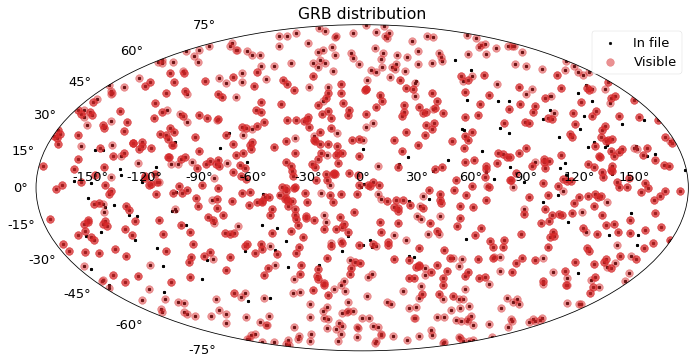

In [3]:
grb_map(g1=grb,g2=g_vis,label1="In file",label2="Visible")

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


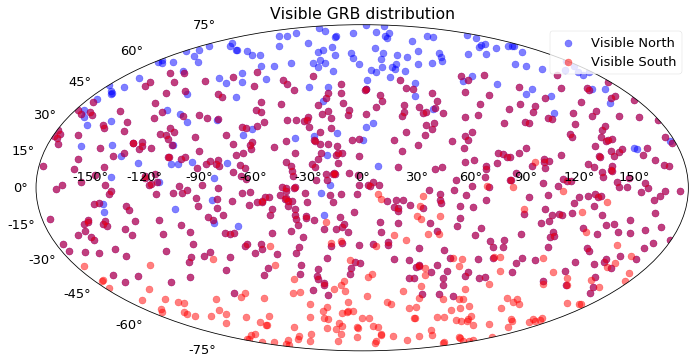

In [4]:
grb_map(g1=g_vis[north],g2=g_vis[south],
        label1="Visible North",
        size1=50,
        c1="blue",
        marker1 = "o",
        alpha1=0.5,
        size2=50,
        c2="red",
        marker2 = "o",
        alpha2=0.5,
        label2="Visible South",
        title="Visible GRB distribution")

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


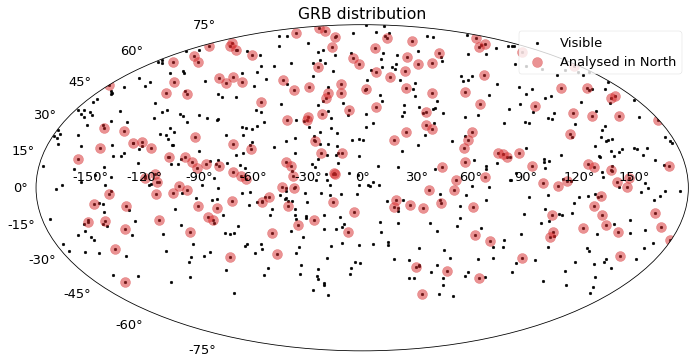

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


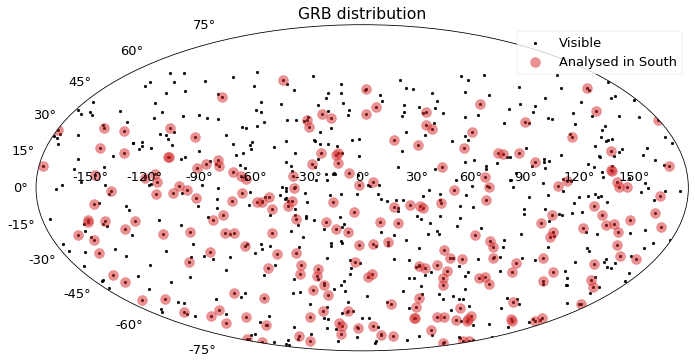

In [5]:
grb_map(g1=g_vis[north],g2=g_ana[north],g3="none",label1="Visible",size2=100,label2="Analysed in North")
grb_map(g1=g_vis[south],g2=g_ana[south],g3="none",label1="Visible",size2=100,label2="Analysed in South")

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


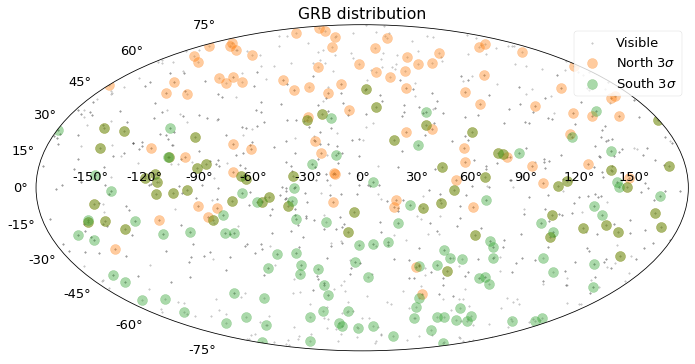

In [6]:
grb_map(g1=g_vis,
        g2=g_3s[north],
        g3=g_3s[south],
        label1="Visible",
        label2="North $3\sigma$",
        label3="South $3\sigma$",
        c1="black",
        c2 ="tab:orange",
        c3 ="tab:green",
        marker1=".",
        marker2="o",
        marker3="o",
        size1 = 10,
        size2=100,
        size3=100,
        alpha1=0.2,
        alpha2=0.4,
        alpha3=0.4)


C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


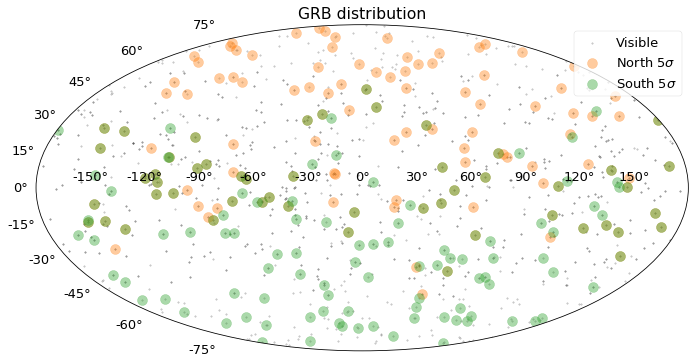

In [7]:
grb_map(g1=g_vis,
        g2=g_5s[north],
        g3=g_5s[south],
        label1="Visible",
        label2="North $5\sigma$",
        label3="South $5\sigma$",
        c1="black",
        c2 ="tab:orange",
        c3 ="tab:green",
        marker1=".",
        marker2="o",
        marker3="o",
        size1 = 10,
        size2=100,
        size3=100,
        alpha1=0.2,
        alpha2=0.4,
        alpha3=0.4)


# Alt-Az

In [63]:
def alt_stat(var,var_start):
    
    n_20_start    = len(var[  var_start.values   >= (90 - 20) ]) # above alt=70°
    n_20          = len(var[  var.values  >= (90 - 20) ]) # Above alt=70°
    n_20_40_start = len(var[ (var_start.values  <  (90 - 20)) & (var_start.values  >= (90 - 40)) ])
    n_20_40       = len(var[ (var.values <  (90 - 20)) & (var.values >= (90 - 40)) ])
    n_40_60_start = len(var[ (var_start.values  <  (90 - 40)) & (var_start.values  >= (90 - 60)) ])
    n_40_60       = len(var[ (var.values <  (90 - 40)) & (var.values >+ (90 - 60)) ])
    n_60_start    = len(var[ var_start.values   <  (90 - 60) ])
    n_60          = len(var[ var.values  <  (90 - 60) ])                              
    tot = n_20 + n_20_40 + n_40_60 + n_60
    tot_start = n_20_start + n_20_40_start + n_40_60_start + n_60_start
    print("   Zenith x : {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}".format("<= 20°",
                                                          "20<x<=40°",
                                                          "40<x<=60°",
                                                          ">60°",
                                                          "Tot"))
    print("------------+----------------------------------------------------------------")
    print("      start : {:10d} {:10d} {:10d} {:10d} {:10d}".format(n_20_start,
                                                                     n_20_40_start,
                                                                     n_40_60_start,
                                                                     n_60_start,
                                                                       tot_start))
    print("    start % : {:9.0f}% {:9.0f}% {:9.0f}% {:9.0f}% {:9.0f}%".format(100*n_20_start/tot_start,
                                                                     100*n_20_40_start/tot_start,
                                                                     100*n_40_60_start/tot_start,
                                                                     100*n_60_start/tot_start,
                                                                       100*tot_start/tot_start))  
    print()
    print("   detected : {:10d} {:10d} {:10d} {:10d} {:10d}".format(n_20,
                                                                     n_20_40,
                                                                     n_40_60,
                                                                     n_60,
                                                                      tot))
    print(" detected % : {:9.0f}% {:9.0f}% {:9.0f}% {:9.0f}% {:9.0f}%".format(100*n_20/tot_start,
                                                                     100*n_20_40/tot_start,
                                                                     100*n_40_60/tot_start,
                                                                     100*n_60/tot_start,
                                                                      100*tot/tot_start))

print("3 sigma")
alt_stat(g_3s.alt3s,g_3s.alt1)  
print()
print("5 sigma")
alt_stat(g_5s.alt5s,g_5s.alt1)                                                                

3 sigma
   Zenith x :     <= 20°  20<x<=40°  40<x<=60°       >60°        Tot
------------+----------------------------------------------------------------
      start :         23         75        100        102        300
    start % :         8%        25%        33%        34%       100%

   detected :         28         90        112         70        300
 detected % :         9%        30%        37%        23%       100%

5 sigma
   Zenith x :     <= 20°  20<x<=40°  40<x<=60°       >60°        Tot
------------+----------------------------------------------------------------
      start :         19         67         88         95        269
    start % :         7%        25%        33%        35%       100%

   detected :         26         80         97         66        269
 detected % :        10%        30%        36%        25%       100%


C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


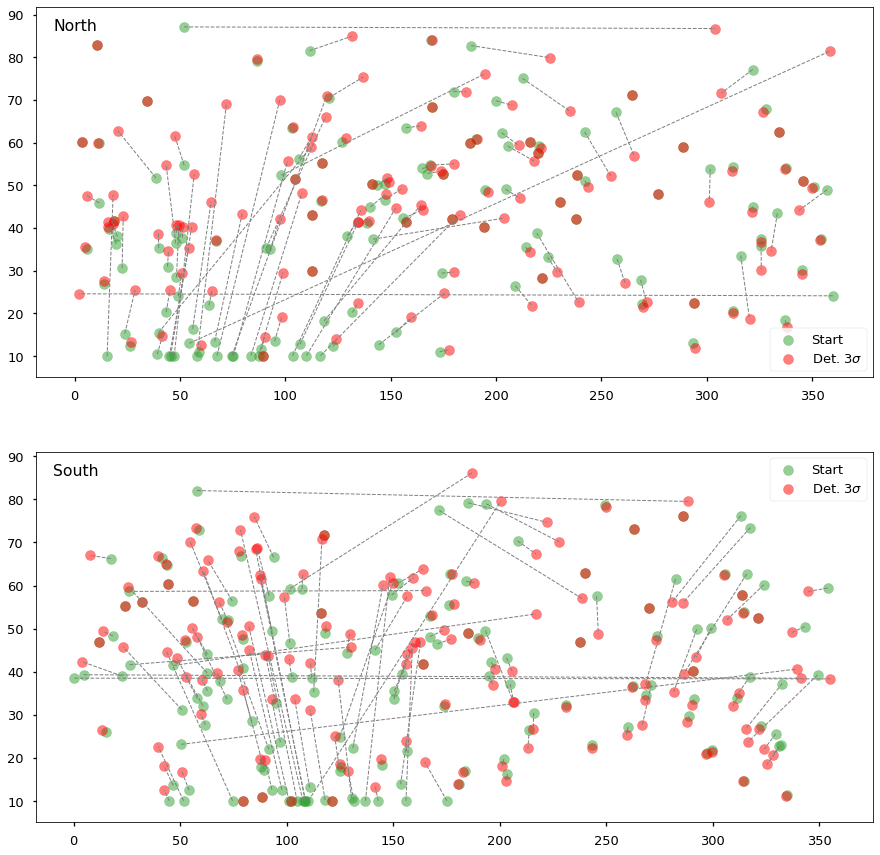

In [8]:
import matplotlib.lines as mlines
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(15,15))

for (ax,site,title) in zip([ax1,ax2],[north,south],["North","South"]):
#     az1 = g_vis[site].az1
#     alt1 = g_vis[site].alt1
#     ax.scatter(az1,alt1,facecolor="black",s=10,label="Visible")
    
    az1 = g_3s[site].az1
    alt1 = g_3s[site].alt1
    ax.scatter(az1,alt1,facecolor="tab:green",alpha=0.5,s=100,label="Start")
    
    az3s = g_3s[site].az3s
    alt3s = g_3s[site].alt3s
    ax.scatter(az3s,alt3s,facecolor="red",alpha=0.5,s=100,label="Det. $3\sigma$")
    
    ax.set_title(title,x=0.02,y=0.92,loc="left")
    
    for i in range(0,len(az3s)):
#    for i in range(0,4):
        l = mlines.Line2D([az1.values[i],az3s.values[i]],[alt1.values[i],alt3s.values[i]],
                          ls="--",lw=1.0,color="grey")
        ax.add_line(l)
        #ax.arrow(az3s.values[i], alt3s.values[i], 10, 10, shape='full', lw=0, length_includes_head=True, head_width=.05)
        #print(i)
    
    ax.legend()

plt.show()

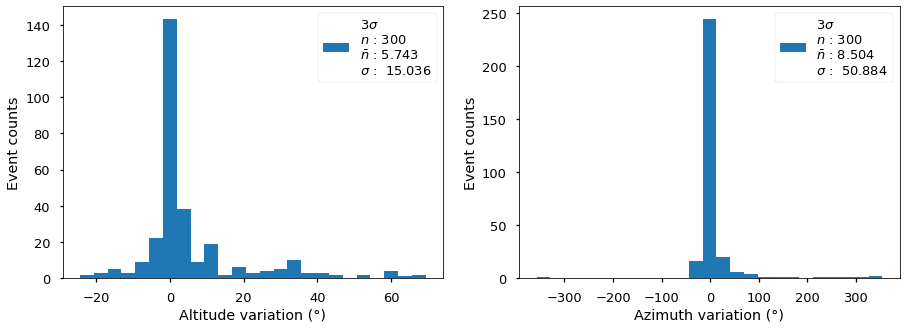

In [103]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.hist(g_3s.alt3s-g_3s.alt1,bins=25,label=MyLabel(g_3s.alt3s-g_3s.alt1,"$3\sigma$"))
ax1.set_xlabel("Altitude variation (°)")
ax1.set_ylabel("Event counts")
ax1.legend()
ax2.hist(g_3s.az3s-g_3s.az1,bins=25,label=MyLabel(g_3s.az3s-g_3s.az1,"$3\sigma$"))
ax2.set_xlabel("Azimuth variation (°)")
ax2.set_ylabel("Event counts")
ax2.legend()
plt.show()

In [50]:
len(az3s)

159